### Armen Khachatrian
### CS 663 - Machine Learning
#### Finnish Dataset

In [84]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

df = pd.read_csv('MopsiLocationsUntil2012-Finland.txt', sep="\t", header=None)
df.head()

,0,1
0,625983,297439
1,626146,297440
2,626144,297456
3,626004,297394
4,626018,297437


> Data Preprocessing: since we know that initial values are related to latitude and longitude respectively. I divided all numbers on 10000

In [85]:
df.columns = ['Latitude_old', 'Longitude_old']
df['Latitude'] = df['Latitude_old']/10000
df['Longitude'] = df['Longitude_old']/10000
df

,Latitude_old,Longitude_old,Latitude,Longitude
0,625983,297439,62.5983,29.7439
1,626146,297440,62.6146,29.7440
2,626144,297456,62.6144,29.7456
3,626004,297394,62.6004,29.7394
4,626018,297437,62.6018,29.7437
...,...,...,...,...
13462,626042,297444,62.6042,29.7444
13463,625977,297443,62.5977,29.7443
13464,626050,297404,62.6050,29.7404
13465,625995,297426,62.5995,29.7426


> Data Preprocessing: delete unnecessary columns

In [86]:
df = df.iloc[:, 2:]
df.head()

,Latitude,Longitude
0,62.5983,29.7439
1,62.6146,29.7440
2,62.6144,29.7456
3,62.6004,29.7394
4,62.6018,29.7437


In [88]:
df.describe()

,Latitude,Longitude
count,13467.000000,13467.000000
mean,62.509478,28.900467
std,0.784433,2.039943
min,59.924700,21.201600
25%,62.593000,29.616400
50%,62.601800,29.744800
75%,62.619200,29.779650
max,69.783500,31.432800


In [89]:
df.isna().sum() #No NaNs

Latitude     0
Longitude    0
dtype: int64

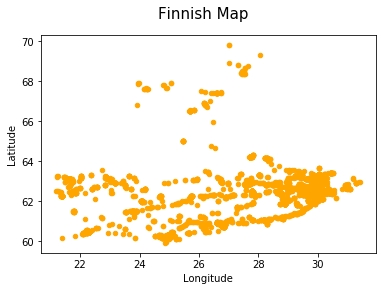

In [90]:
import matplotlib
df.plot(kind='scatter', x = 'Longitude',y = 'Latitude', color = 'orange')
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.suptitle('Finnish Map', size=15)
matplotlib.rcParams['figure.figsize'] = (8.0, 8.0)

> Remark: the graph illustrates that routes in Finland were wide-spread in 2014. The presence of most of the dots from 60 to 62 (latitude) gives the guess that they are related to the continental part, as opposed to kind of "outliers", which are related to islands. Clearly, most of the routes occurred on the continent because we can assume that all cities in Finland are located there.

> Number of cluster prediction: below I am using Elbow Rule to find how many clusters do I need. 

In [92]:
from sklearn.cluster import KMeans  
from scipy.spatial.distance import cdist 

distortions = [] 
inertias = [] 
mapping1 = {} 
mapping2 = {} 
K = range(1,10) 
  
for k in K: 
    #Building and fitting the model 
    kmeanModel = KMeans(n_clusters=k).fit(df) 
    kmeanModel.fit(df)     
      
    distortions.append(sum(np.min(cdist(df, kmeanModel.cluster_centers_, 
                      'euclidean'),axis=1)) / df.shape[0]) 
    inertias.append(kmeanModel.inertia_) 
  
    mapping1[k] = sum(np.min(cdist(df, kmeanModel.cluster_centers_, 
                 'euclidean'),axis=1)) / df.shape[0] 
    mapping2[k] = kmeanModel.inertia_ 

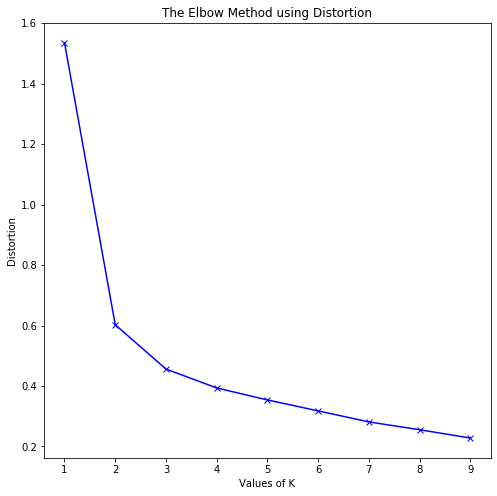

In [93]:
plt.plot(K, distortions, 'bx-') 
plt.xlabel('Values of K') 
plt.ylabel('Distortion') 
plt.title('The Elbow Method using Distortion') 
plt.show() 

> Graph interpretation: to determine the optimal number of clusters, we have to select the value of k at the “elbow” i.e. the point after which the distortion start decreasing in a linear trajectory. Thus for the given data, we conclude that the optimal number of clusters for the data is 3 (rather than 2)

> Remark: we will run both number of clusters (2 and 3) to assess the performance

> Method: **KMeans**:\
I used this method for this dataset because it scales to large data sets with not a huge number of features. Here, we see that the number of clusters is equal to 2 or 3. K-Means guarantees converenge (because geometry metric). Also, in K-Means we use distances between all points like the metric.  

In [124]:
X = df[['Longitude','Latitude']]
X = X.to_numpy() #we need array
X

array([[29.7439, 62.5983],
       [29.744 , 62.6146],
       [29.7456, 62.6144],
       ...,
       [29.7404, 62.605 ],
       [29.7426, 62.5995],
       [29.7431, 62.5982]])

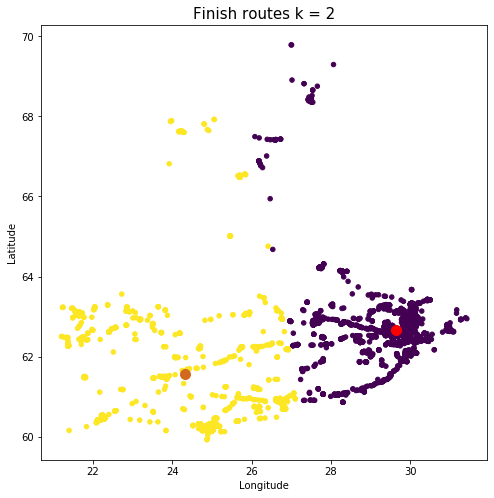

In [123]:
labels_2 = KMeans(2, random_state=0).fit_predict(X)
kmeans_2 = KMeans(n_clusters=2, random_state=0).fit(X)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Finish routes k = 2', size =15)
plt.scatter(X[:,0], X[:,1], c=labels_2,
            s=20, cmap='viridis')

plt.scatter(kmeans_2.cluster_centers_[0][0],kmeans_2.cluster_centers_[0][1], color = 'red', s = 100)
plt.scatter(kmeans_2.cluster_centers_[1][0],kmeans_2.cluster_centers_[1][1], color = 'chocolate', s = 100)

> Graph interpretation: chocolate and red points are centroids of two clusters

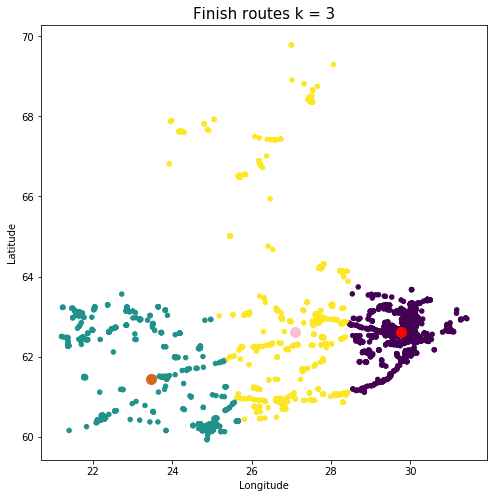

In [122]:
labels_3 = KMeans(3, random_state=0).fit_predict(X)
kmeans_3 = KMeans(n_clusters=3, random_state=0).fit(X)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Finish routes k = 3', size =15)
plt.scatter(X[:,0], X[:,1], c=labels_3,
            s=20, cmap='viridis')

plt.scatter(kmeans_3.cluster_centers_[0][0],kmeans_3.cluster_centers_[0][1], color = 'red', s = 100)
plt.scatter(kmeans_3.cluster_centers_[1][0],kmeans_3.cluster_centers_[1][1], color = 'chocolate', s = 100)
plt.scatter(kmeans_3.cluster_centers_[2][0],kmeans_3.cluster_centers_[2][1], color = 'pink', s = 100)

> Graph interpretation: here, we have 3 clusters and three centroids related to each of them (chocolate, pink, red). K-Means separated the data into these clusters. We can remark that routes on islands are connected with the routes in the middle part of Finland. Emerald dots are connected with routes from the west part of the country, whereas purple points are focused on the east part of Finland. We can visually assess the distances between cluster points and their cluster centroids. The distances from clusters' (emerald and purple) centroids to their clusters' points look correctly in terms of a similar spread from centroids. According to the yellow cluster, island points are closer to this cluster rather than to others. Based on metrics (in clusterisation we do not know the "true" labels), we can estimate the performance of the algorithm (eyeball). I can **conclude** that 3 clusters are the most optimal for this dataset. 